# Import libraries

In [319]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Import data

In [322]:
df = pd.read_csv('Loans_Dataset.csv')
df.head(10)

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


# Preprocessing

## Get required data

In [326]:
df.drop(columns = ['house_number'], inplace=True)
df.head(10)

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes
5,406,10187,166,13827,yes
6,461,10252,172,13947,yes
7,158,10192,144,13963,yes
8,136,10376,230,13965,yes
9,194,10092,626,13995,yes


## Describe

In [329]:
df.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


## Distribution

<Axes: xlabel='credit_score', ylabel='Density'>

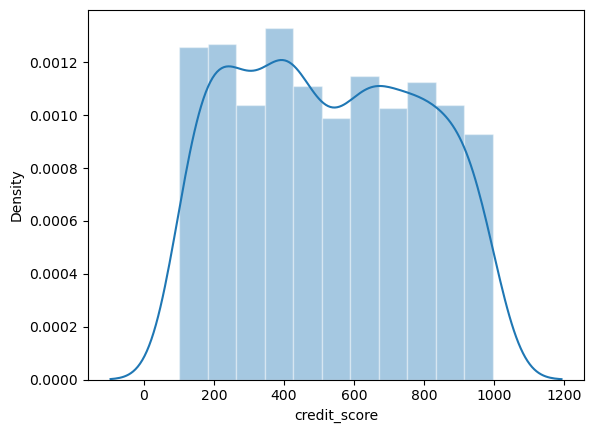

In [332]:
sns.histplot(
    df["credit_score"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

## Label encoding

In [335]:
le = LabelEncoder()
df['result']= le.fit_transform(df['result'])

## Correlation matrix

In [338]:
df.corr()

,initial_payment,last_payment,credit_score,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.068387,-0.076326
sum,0.050698,0.213237,0.068387,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.092830,1.000000


<Axes: >

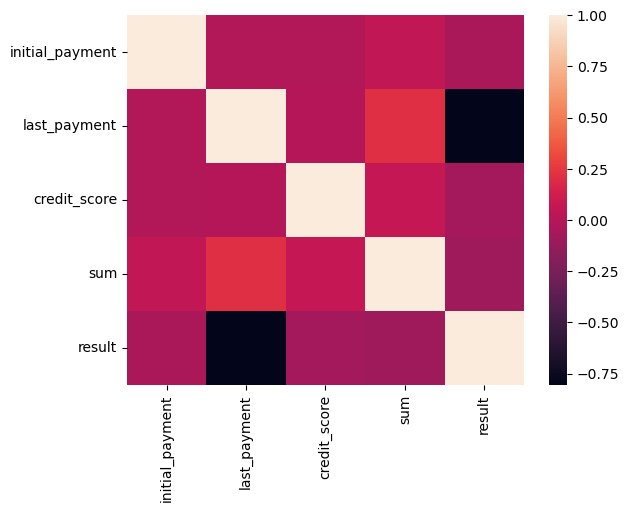

In [340]:
sns.heatmap(df.corr())

## Drop insignificant data

In [343]:
df.drop(columns=['last_payment'], inplace=True)

## Relationship

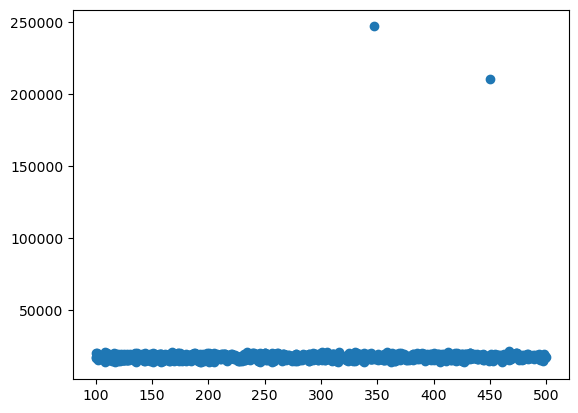

In [346]:
plt.scatter(df['initial_payment'], df['sum'])

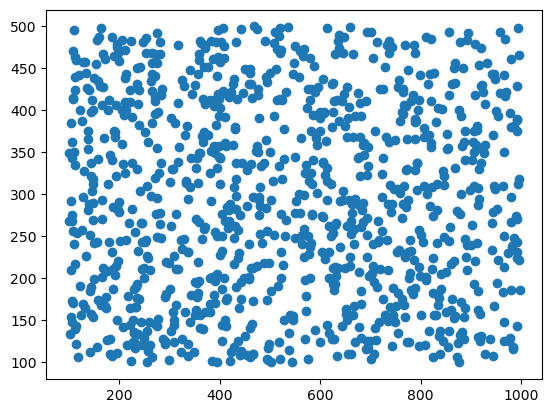

In [348]:
plt.scatter(df['credit_score'], df['initial_payment'])

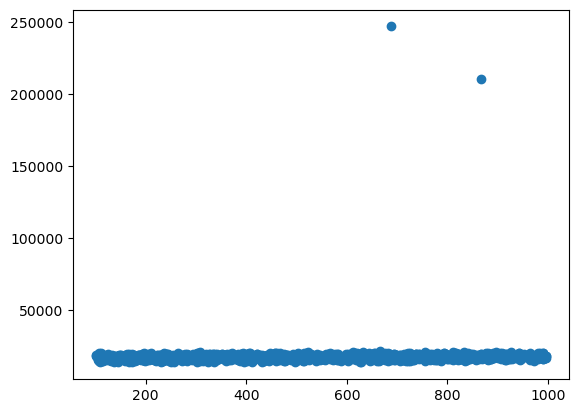

In [350]:
plt.scatter(df['credit_score'], df['sum'])

# Modeling

## Split data

### Independent/Dependent variables

In [355]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train/Test sets

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

## Feature scaling

In [361]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train model

In [364]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predict result / Score model

In [367]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

# Evaluation

## Accuracy

In [371]:
accuracy_score(y_test, y_pred)

1.0

## Classification report

In [374]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        95

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



## F1 score

In [377]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


## Confusion matrix

<Axes: >

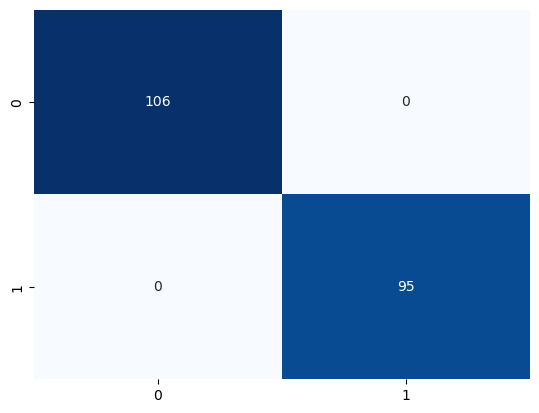

In [380]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Verify example

In [383]:
# Predict loan repayment Initial Payment = 100, Credit Score = 300, Sum = 14567832
print(classifier.predict(sc.transform([[100,300,14567832]])))

[1]


In [389]:
# Predict loan repayment Initial Payment = 130, Credit Score = 231, Sum = 18681
print(classifier.predict(sc.transform([[130,231,18681]])))

[0]


## K-Fold Cross Validation

In [392]:
splits = 5
kf = KFold(n_splits=splits, shuffle=True, random_state=42)

In [394]:
metrics = []
fold_scores = []

In [396]:
for metric in ['accuracy', 'f1', 'precision', 'recall']:
    scores = cross_val_score(classifier, X, y, cv=kf, scoring=metric)
    metrics.append(metric)
    fold_scores.append(scores)

In [398]:
columns = ['Metric'] + [f'Fold {i+1}' for i in range(splits)]
stats = []

In [400]:
for metric, scores in zip(metrics, fold_scores):
    row = [metric.capitalize().ljust(10)] + \
          [f'{score:.3f}'.rjust(10) for score in scores]
    stats.append(row)

In [402]:
stats_df = pd.DataFrame(stats, columns=columns)

In [404]:
print(stats_df)

       Metric      Fold 1      Fold 2      Fold 3      Fold 4      Fold 5
0  Accuracy         0.995       0.995       1.000       1.000       0.995
1  F1               0.995       0.995       1.000       1.000       0.995
2  Precision        0.989       0.991       1.000       1.000       1.000
3  Recall           1.000       1.000       1.000       1.000       0.990
